In [30]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [43]:
#CALIFORNIA HOUSING DATASET

cal_ds = fetch_california_housing()
california_ds = pd.DataFrame(cal_ds.data, columns=cal_ds.feature_names)
california_ds['target'] = cal_ds.target

In [44]:
california_ds.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [46]:
#BOSTON HOUSING DATASET

import pandas as pd
import numpy as np

# URL for the Boston Housing dataset
data_url = "http://lib.stat.cmu.edu/datasets/boston"

# Load the dataset with special handling for non-standard structure
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)

# The dataset is structured with alternating rows for each observation
# Combine them manually
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

# Convert to DataFrame for easier handling
column_names = [
    "CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX",
    "PTRATIO", "B", "LSTAT"
]
boston_df = pd.DataFrame(data, columns=column_names)
boston_df['MEDV'] = target

# Preview the data
boston_df.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [74]:
from sklearn.model_selection import train_test_split


# Split each dataset into training and testing sets

#California dataset splitting
# Separate features and target variable
X_california = california_ds.drop('target', axis=1)
y_california = california_ds['target']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_california, X_test_california, y_train_california, y_test_california = train_test_split(X_california, y_california, test_size=0.2, random_state=42)



#Boston Dataset splitting
# Separate features and target variable
X_boston = boston_df.drop('MEDV', axis=1)  # Features
y_boston = boston_df['MEDV']               # Target variable

# Split into training and testing sets (80% train, 20% test)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_boston, X_test_boston, y_train_boston, y_test_boston = train_test_split(X_boston, y_boston, test_size=0.2, random_state=42)


# Display shapes of the resulting datasets
print("Training set shape for California:", X_train_california.shape, y_train_california.shape)
print("Testing set shape for California:", X_test_california.shape, y_test_california.shape)
print("Training set shape for Boston:", X_train_boston.shape, y_train_boston.shape)
print("Testing set shape for Boston:", X_test_boston.shape, y_test_boston.shape)


Training set shape for California: (16512, 8) (16512,)
Testing set shape for California: (4128, 8) (4128,)
Training set shape for Boston: (404, 13) (404,)
Testing set shape for Boston: (102, 13) (102,)


In [66]:
# Standardize the features for California
scaler_california = StandardScaler()
X_train_california = scaler_california.fit_transform(X_train_california)
X_test_california = scaler_california.transform(X_test_california)


# Standardize the features for Boston
scaler_boston = StandardScaler()
X_train_boston = scaler_boston.fit_transform(X_train_boston)
X_test_boston = scaler_boston.transform(X_test_boston)

In [67]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense



#Building the sequential model for both California and Boston Datasets

def build_model(input_shape):
    model = Sequential([
        Dense(64, activation='relu', input_shape=(input_shape,)),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(1)  # Output layer for regression
    ])
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model


In [75]:
# Build the model for the California dataset
california_model = build_model(X_train_california.shape[1])

# Train the model
history_california = california_model.fit(
    X_train_california, y_train_california,
    validation_data=(X_test_california, y_test_california),
    epochs=10, batch_size=32, verbose=1
)

# Evaluate the model
y_pred_california = california_model.predict(X_test_california)
mse_california = mean_squared_error(y_test_california, y_pred_california)
print(f"California Housing Model MSE: {mse_california}")


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


516/516 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 2377.9392 - mae: 15.1896 - val_loss: 1.0333 - val_mae: 0.7735
Epoch 2/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.2272 - mae: 0.8342 - val_loss: 0.9237 - val_mae: 0.7401
Epoch 3/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.9565 - mae: 0.7547 - val_loss: 0.8941 - val_mae: 0.7365
Epoch 4/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.9304 - mae: 0.7426 - val_loss: 2.3039 - val_mae: 1.1427
Epoch 5/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 1.6118 - mae: 0.9088 - val_loss: 1.7264 - val_mae: 1.0549
Epoch 6/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 6.5497 - mae: 1.4056 - val_loss: 1.9106 - val_mae: 1.1059
Epoch 7/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 3.8390 - mae: 1.1915 - val_loss: 1.2333 - val_mae: 0.9058
Epoch 8/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.8750 - mae: 0.9290 - val_loss: 0.9188 - val_mae: 0.6991
Epoch 9/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 10.

In [70]:
# Build the model for the Boston dataset
boston_model = build_model(X_train_boston.shape[1])

# Train the model
history_boston = boston_model.fit(
    X_train_boston, y_train_boston,
    validation_data=(X_test_boston, y_test_boston),
    epochs=10, batch_size=32, verbose=1
)

# Evaluate the model
y_pred_boston = boston_model.predict(X_test_boston)
mse_boston = mean_squared_error(y_test_boston, y_pred_boston)
print(f"Boston Housing Model MSE: {mse_boston}")


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 573.3063 - mae: 22.3144 - val_loss: 487.5601 - val_mae: 20.3381
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 514.7676 - mae: 20.9409 - val_loss: 409.1343 - val_mae: 18.3194
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 415.9124 - mae: 18.4299 - val_loss: 275.8365 - val_mae: 14.5694
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 257.9961 - mae: 13.8970 - val_loss: 113.9495 - val_mae: 8.9489
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 104.1581 - mae: 8.4076 - val_loss: 55.8983 - val_mae: 5.3202
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 64.4129 - mae: 6.3182 - val_loss: 39.6806 - val_mae: 4.2561
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 40.9600 - mae: 4.8835 - val_loss: 34.3971 - val_mae: 3.9061
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 30.3581 - mae: 4.0211 - val_loss: 29.3205 - val_mae: 3.5535
Epoch 9/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/st

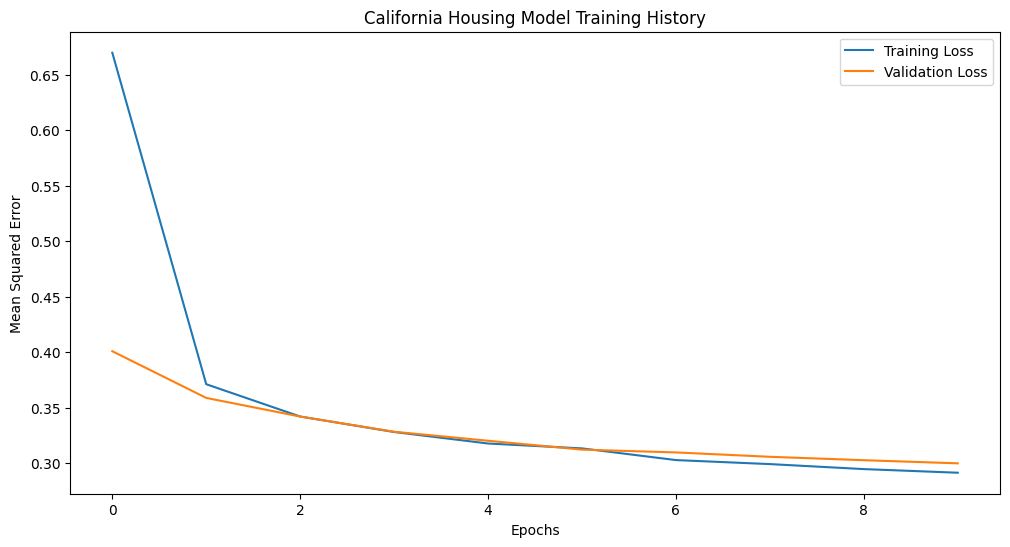

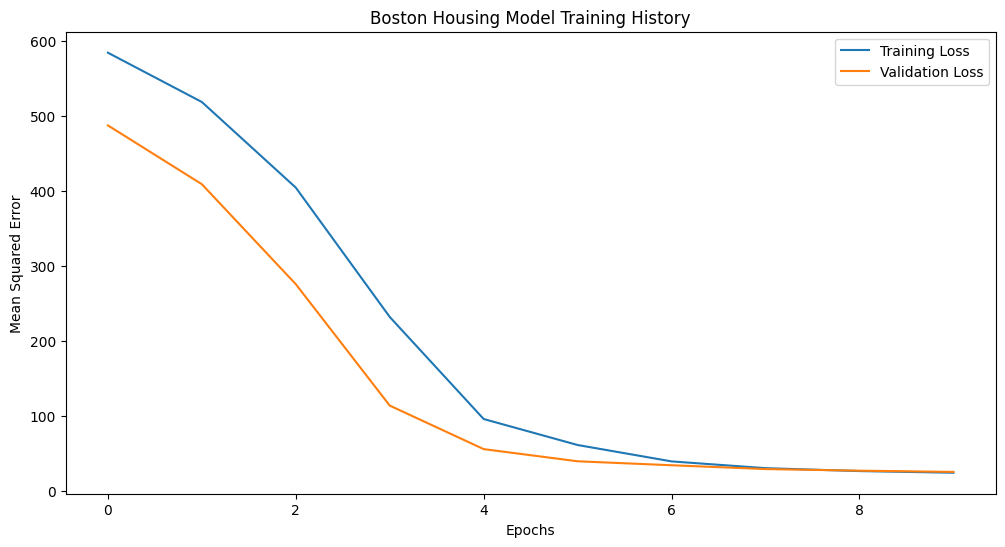

In [71]:
import matplotlib.pyplot as plt

def plot_history(history, title):
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Mean Squared Error')
    plt.legend()
    plt.show()

plot_history(history_california, "California Housing Model Training History")
plot_history(history_boston, "Boston Housing Model Training History")


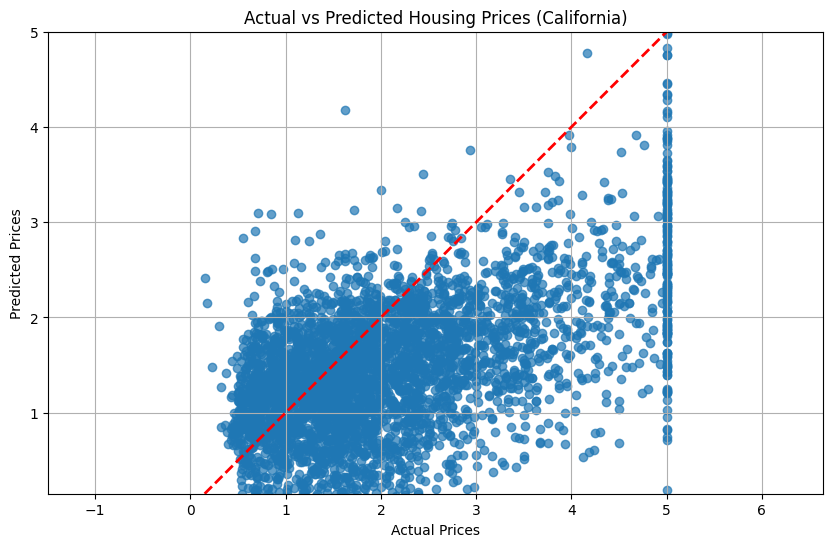

In [77]:
import matplotlib.pyplot as plt

#ACTUAL vs PREDICTED CALIFORNIA HOUSING PRICES

# Plotting Actual vs. Predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test_california, y_pred_california, alpha=0.7)
plt.plot([y_test_california.min(), y_test_california.max()],
         [y_test_california.min(), y_test_california.max()], 'r--', lw=2)  # Line of perfect prediction
plt.title("Actual vs Predicted Housing Prices (California)")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.grid()
plt.axis('equal')  # Equal aspect ratio ensures the diagonal line is at 45 degrees
plt.xlim(y_test_california.min(), y_test_california.max())
plt.ylim(y_test_california.min(), y_test_california.max())
plt.show()


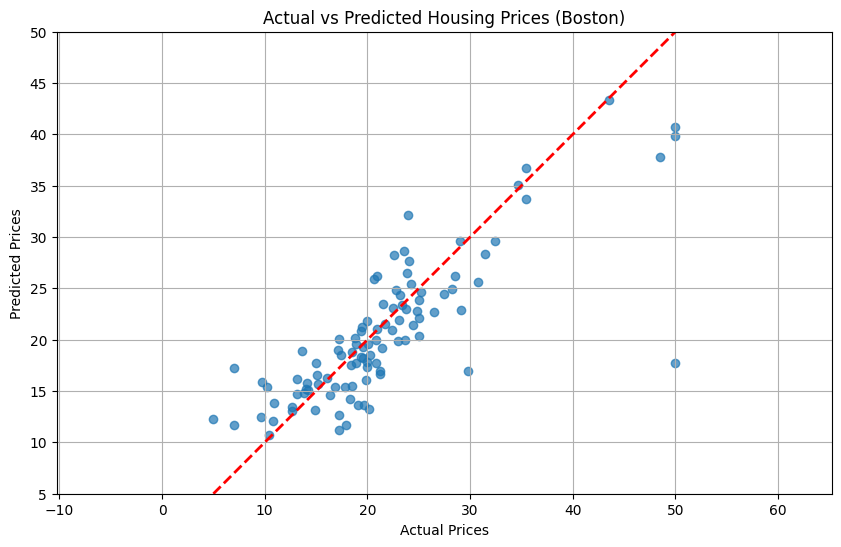

In [78]:
#ACTUAL vs PREDICTED BOSTON HOUSING PRICES

# Plotting Actual vs. Predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test_boston, y_pred_boston, alpha=0.7)
plt.plot([y_test_boston.min(), y_test_boston.max()],
         [y_test_boston.min(), y_test_boston.max()], 'r--', lw=2)  # Line of perfect prediction
plt.title("Actual vs Predicted Housing Prices (Boston)")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.grid()
plt.axis('equal')  # Equal aspect ratio ensures the diagonal line is at 45 degrees
plt.xlim(y_test_boston.min(), y_test_boston.max())
plt.ylim(y_test_boston.min(), y_test_boston.max())
plt.show()


In [88]:
#Second model building for hyperparameter tuning.

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

#I increased the number of laters and include learning rate
def parameter_model(input_shape, learning_rate=0.001):  # Default learning rate
    model = Sequential([
        Dense(128, activation='relu', input_shape=(input_shape,)),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(32, activation='relu'),
        Dense(1)  # Output layer for regression
    ])

    # Create an Adam optimizer with the specified learning rate
    optimizer = Adam(learning_rate=learning_rate)

    # Compile the model with the custom optimizer
    model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

    return model


In [89]:
# Build the model for the California dataset the second time.

california_model = parameter_model(X_train_california.shape[1])

# Train the model
history_california = california_model.fit(
    X_train_california, y_train_california,
    validation_data=(X_test_california, y_test_california),
    epochs=10, batch_size=32, verbose=1
)

# Evaluate the model the second time
y_pred_california = california_model.predict(X_test_california)
mse_california = mean_squared_error(y_test_california, y_pred_california)
print(f"California Housing Model MSE: {mse_california}")

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


516/516 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 84.2552 - mae: 3.3303 - val_loss: 4.4721 - val_mae: 1.6822
Epoch 2/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 8.9935 - mae: 1.6035 - val_loss: 1.7679 - val_mae: 1.1083
Epoch 3/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 6.0905 - mae: 1.4035 - val_loss: 1.1314 - val_mae: 0.9000
Epoch 4/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 1.1686 - mae: 0.8380 - val_loss: 0.9167 - val_mae: 0.6979
Epoch 5/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1.3758 - mae: 0.8519 - val_loss: 0.7298 - val_mae: 0.6286
Epoch 6/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1.6454 - mae: 0.8695 - val_loss: 0.8482 - val_mae: 0.6943
Epoch 7/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.0464 - mae: 0.7789 - val_loss: 0.7019 - val_mae: 0.6433
Epoch 8/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.9541 - mae: 0.7283 - val_loss: 0.6870 - val_mae: 0.6169
Epoch 9/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.9228

In [90]:
# Build the model for the Boston dataset the second time.

boston_model = parameter_model(X_train_boston.shape[1])

# Train the model
history_boston = boston_model.fit(
    X_train_boston, y_train_boston,
    validation_data=(X_test_boston, y_test_boston),
    epochs=10, batch_size=32, verbose=1
)

# Evaluate the model the second time
y_pred_boston = boston_model.predict(X_test_boston)
mse_boston = mean_squared_error(y_test_boston, y_pred_boston)
print(f"Boston Housing Model MSE: {mse_boston}")

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 153.2072 - mae: 9.6710 - val_loss: 84.8504 - val_mae: 7.7093
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 71.3329 - mae: 6.2175 - val_loss: 50.7248 - val_mae: 5.6756
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 56.8539 - mae: 5.4119 - val_loss: 42.7516 - val_mae: 4.7419
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 51.1398 - mae: 5.0659 - val_loss: 43.8743 - val_mae: 5.1585
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 50.7675 - mae: 5.0745 - val_loss: 43.2333 - val_mae: 5.1536
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 49.8071 - mae: 5.0657 - val_loss: 40.5531 - val_mae: 5.0173
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 47.9758 - mae: 4.9655 - val_loss: 43.2264 - val_mae: 5.4312
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 47.3267 - mae: 4.9697 - val_loss: 40.1682 - val_mae: 5.1700
Epoch 9/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 45.2053

California Housing Model MSE: 0.680105128630893


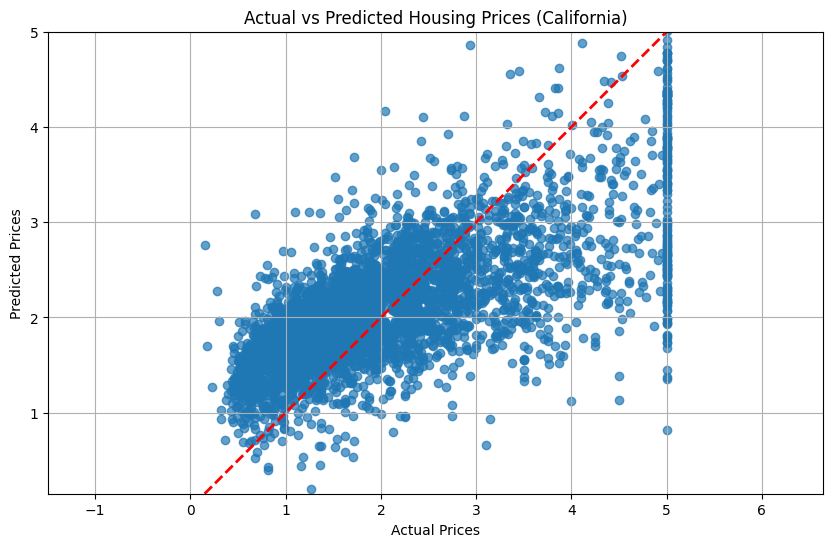

In [91]:
#Second time Actual vs Predicted Housing Prices (California)

import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Assuming y_test_california and y_pred_california are already defined
# Evaluate the model
mse_california = mean_squared_error(y_test_california, y_pred_california)
print(f"California Housing Model MSE: {mse_california}")

# Plotting Actual vs. Predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test_california, y_pred_california, alpha=0.7)
plt.plot([y_test_california.min(), y_test_california.max()],
         [y_test_california.min(), y_test_california.max()], 'r--', lw=2)  # Line of perfect prediction
plt.title("Actual vs Predicted Housing Prices (California)")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.grid()
plt.axis('equal')  # Equal aspect ratio ensures the diagonal line is at 45 degrees
plt.xlim(y_test_california.min(), y_test_california.max())
plt.ylim(y_test_california.min(), y_test_california.max())
plt.show()


Boston Housing Model MSE: 38.40686576032886


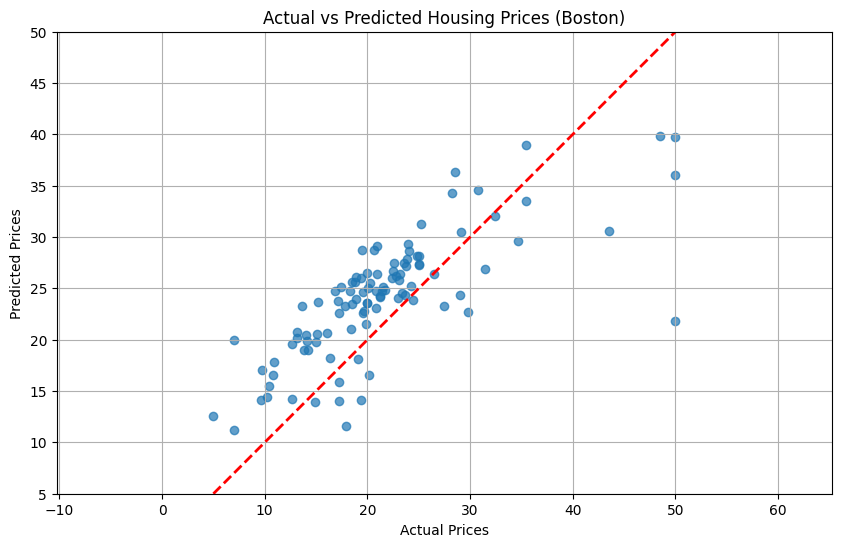

In [92]:
#Second time Actual vs Predicted Housing Prices (Boston)

import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Assuming y_test_boston and y_pred_boston are already defined
# Evaluate the model
mse_boston = mean_squared_error(y_test_boston, y_pred_boston)
print(f"Boston Housing Model MSE: {mse_boston}")

# Plotting Actual vs. Predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test_boston, y_pred_boston, alpha=0.7)
plt.plot([y_test_boston.min(), y_test_boston.max()],
         [y_test_boston.min(), y_test_boston.max()], 'r--', lw=2)  # Line of perfect prediction
plt.title("Actual vs Predicted Housing Prices (Boston)")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.grid()
plt.axis('equal')  # Equal aspect ratio ensures the diagonal line is at 45 degrees
plt.xlim(y_test_boston.min(), y_test_boston.max())
plt.ylim(y_test_boston.min(), y_test_boston.max())
plt.show()


**SUMMARY:**

The code effectively demonstrates the entire workflow for building and evaluating regression models using deep learning, from data acquisition and preprocessing to training and visualization of results. It shows how to handle different datasets, apply machine learning techniques, and visualize model performance in a comprehensive manner.

In other word this basically handles data preprocessing, model building, training, evaluation, and visualization steps for two classic housing price datasets.


**FOR CALIFORNIA HOUSING PRICE DATASET**:

The California analyzes a visualization of actual versus predicted housing prices from the California housing dataset, highlighting key insights:

Model Performance:

The Mean Squared Error (MSE) is about 0.68, indicating average prediction errors.
A red dashed line represents perfect predictions; points near this line are accurate, while those far away indicate errors.

Prediction Patterns:

There is a positive correlation between actual and predicted prices.
The model performs better for mid-range prices (2-3) but shows more variance for higher prices (4-6), indicating less reliability for expensive homes.
High-value properties tend to be underpredicted.

The second visualization for California suggests the model performs reasonably well for typical California housing prices but could benefit from improvements for predicting high-value properties.

**FOR BOSTON HOUSING PRICE DATASET:**

The Boston housing dataset, highlighting key insights regarding the model's performance:

Model Performance:

The Mean Squared Error (MSE) is approximately 38.41, much higher than the California model's MSE of 0.68, indicating larger overall prediction errors.
Notable deviations from the red dashed line, which represents perfect predictions, are observed.

Prediction Patterns:

Most predictions cluster between $15,000 and $30,000.
The model systematically underpredicts higher-priced homes (over $35,000) and shows a wider spread of predictions than the California dataset, suggesting less consistency.
There is a tendency for lower values to cluster above the line and higher values below it, indicating a bias.

The second visualization for Boston suggests the Boston housing model needs significant improvement, particularly in handling higher-priced properties and reducing overall prediction error.
